In [56]:
import os
import torch
from torchvision import transforms
from deep_learning_playground.papers.zfnet import zfnet
from matplotlib import pyplot as plt
import torchvision

In [57]:
def rescale_tensor(tensor):
    value_range = [tensor.min(), tensor.max()]

    return (tensor - value_range[0])/(value_range[1]-value_range[0])

In [58]:
cifarDataPath = './data/CIFAR100'
download = not os.path.exists(f"{cifarDataPath}/cifar-100-python")
ds = torchvision.datasets.CIFAR100(root = cifarDataPath, download=download)

In [59]:
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

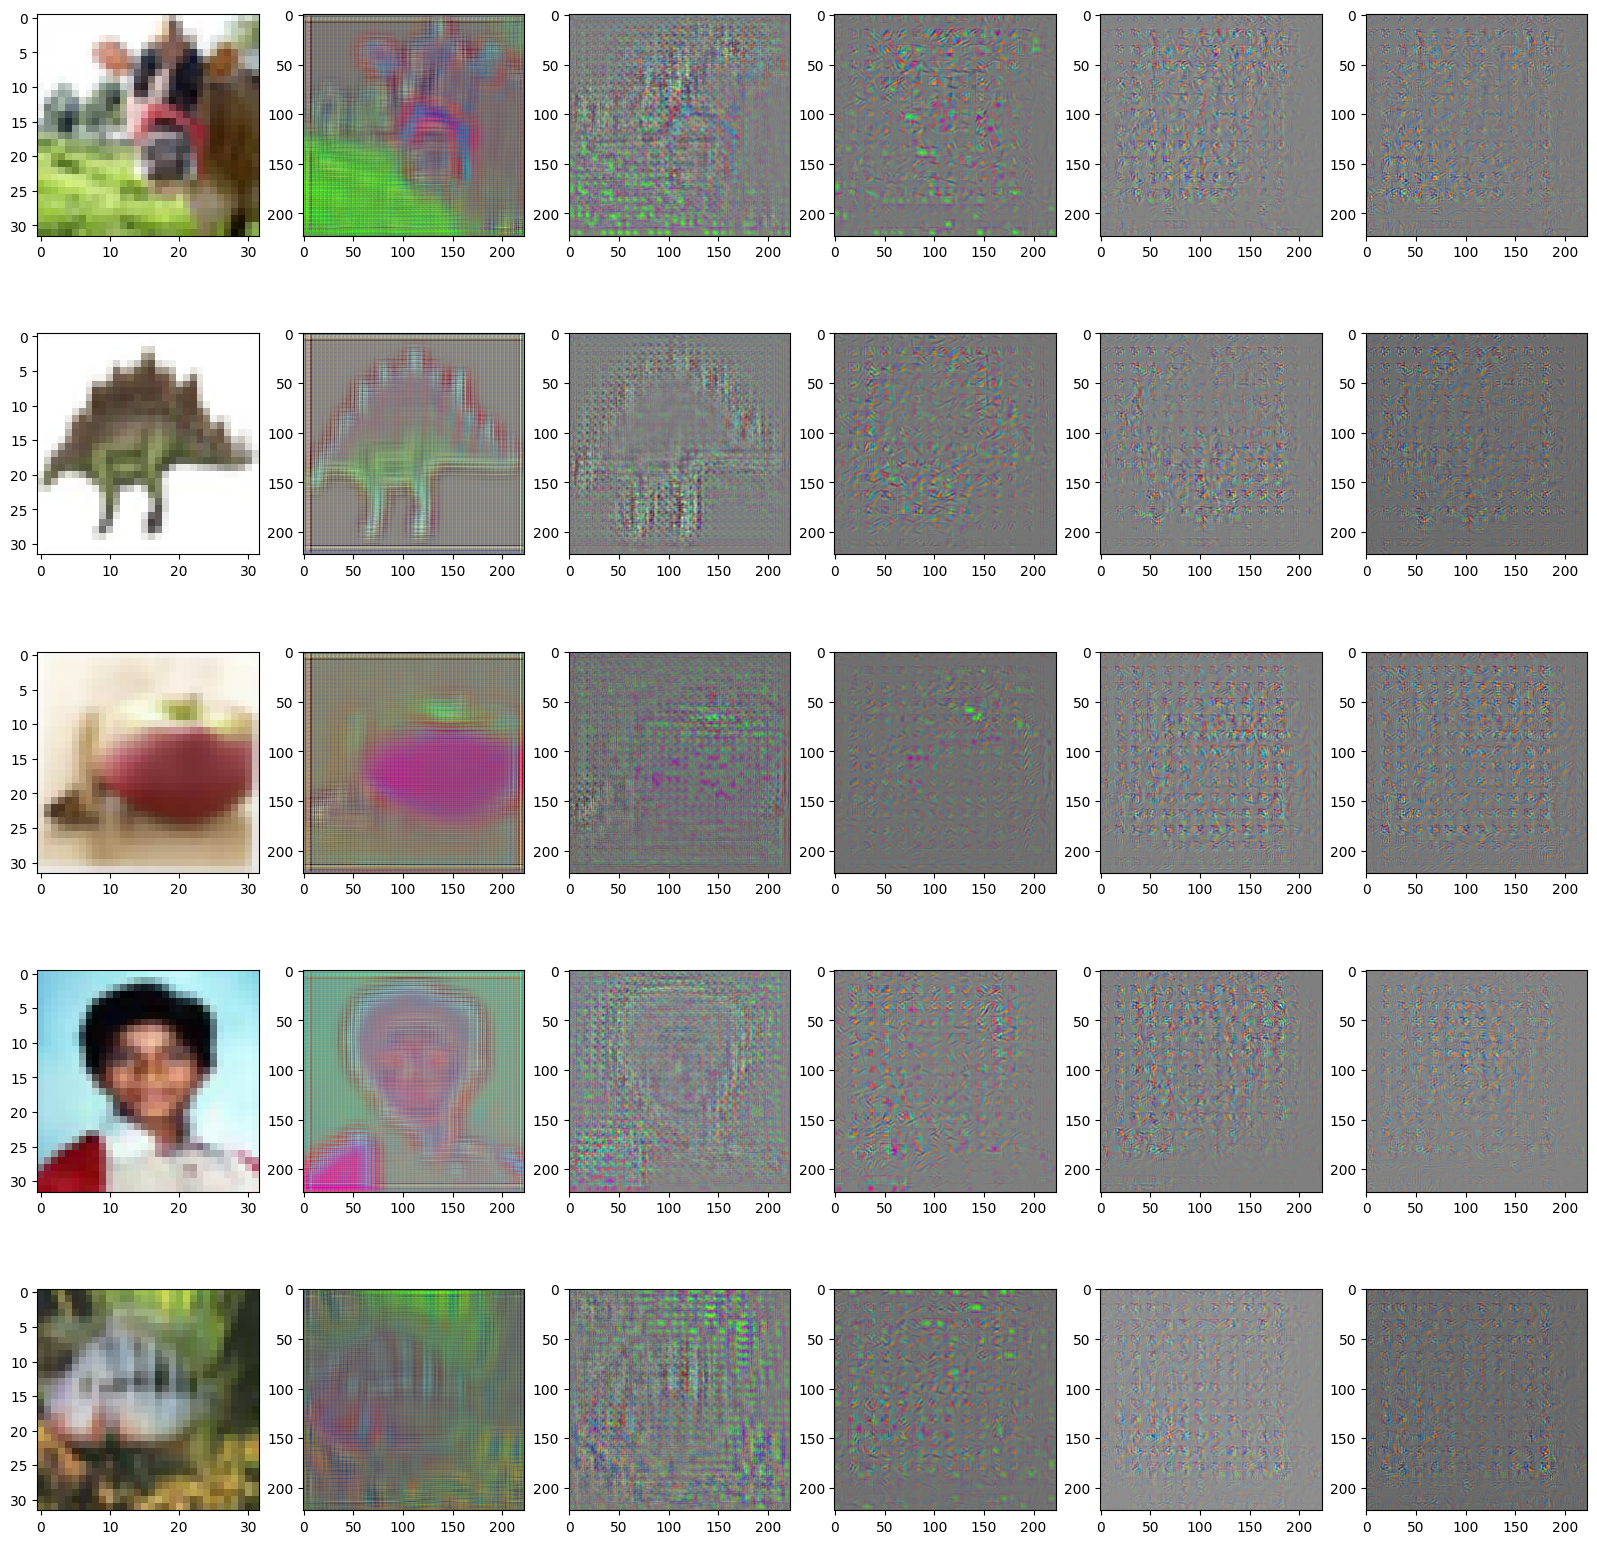

In [60]:
plt.rcParams["figure.figsize"] = (20,20)
fig, axs = plt.subplots(5, 6)
for i, item in enumerate(iter(ds)):
    image = item[0]
    if i > 4:
        break

    x = preprocess(image)[None, :]
    model = zfnet.AlexNetWrapper()
    _ = model(x)

    for j in range(5):
        reconstructed_input = model.reverse_feature_map(start_layer = j, i_feature_map = 1)
        with torch.no_grad():
            axs[i,j+1].imshow(rescale_tensor(reconstructed_input)[0].permute(1,2,0))

    axs[i,0].imshow(image)
plt.show()